In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
sns.set()

Load Data

In [2]:
data = pd.read_csv('California_Real_Estate.csv', sep=';')
df_real_state = data.copy()
df_real_state.head(5)

,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1,2005.0,11.0,0,30.0,743,246173,1
1,1,2005.0,10.0,0,29.0,756,246332,1
2,2,2007.0,7.0,0,2.0,587,209281,1
3,2,2007.0,12.0,0,31.0,1605,452667,1
4,1,2004.0,11.0,0,49.0,1375,467083,1


Discard de rows with NaN values

In [3]:
df_real_state.isnull().sum()

Building             0
Year of sale        72
Month of sale       72
Type of property     0
Property #          60
Area (ft.)           0
Price                0
Status               0
dtype: int64

We use the Status because if is 0 it means the house isnt sold

In [4]:
df_real_state_nonull = df_real_state[df_real_state['Status'] == 1]
df_real_state_nonull.head(2)

,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
0,1,2005.0,11.0,0,30.0,743,246173,1
1,1,2005.0,10.0,0,29.0,756,246332,1


In [5]:
df_real_state_nonull.isnull().sum()

Building            0
Year of sale        0
Month of sale       0
Type of property    0
Property #          0
Area (ft.)          0
Price               0
Status              0
dtype: int64

Standardization - Mean=0 Std=1

In [6]:
scaler = StandardScaler()

In [7]:
df_re_nonull_std = scaler.fit_transform(df_real_state_nonull)
df_re_nonull_std

array([[-1.26112759, -1.24588876,  1.10629248, ..., -0.6013334 ,
        -0.29104848,  0.        ],
       [-1.26112759, -1.24588876,  0.80955653, ..., -0.55148936,
        -0.28905908,  0.        ],
       [-0.4548329 ,  0.62294438, -0.08065131, ..., -1.19946184,
        -0.75264086,  0.        ],
       ...,
       [-1.26112759, -1.24588876, -0.08065131, ..., -1.04992973,
        -0.81327396,  0.        ],
       [-1.26112759, -1.24588876, -0.08065131, ..., -0.55148936,
        -1.00396922,  0.        ],
       [-1.26112759, -1.24588876, -0.08065131, ..., -1.04992973,
        -0.81837886,  0.        ]])

In [8]:
pca = PCA()
pca.fit_transform(df_re_nonull_std)

array([[-0.60734881,  1.31926442,  0.57906783, ..., -0.25542486,
         0.2337479 ,  0.        ],
       [-0.58105774,  1.34289556,  0.32392824, ..., -0.18273758,
         0.199292  ,  0.        ],
       [-1.8398805 , -0.1606641 , -0.29157809, ..., -0.71379278,
         0.2905317 ,  0.        ],
       ...,
       [-1.03970034,  1.18485044, -0.6530342 , ..., -0.00559872,
         0.19757116,  0.        ],
       [-0.76196533,  1.19268984, -0.64690188, ..., -0.00744995,
        -0.28604396,  0.        ],
       [-0.82936359,  1.09937408, -0.7236547 , ..., -0.01692015,
         0.20697981,  0.        ]])

Is important to note that the values in this feature vector decrease by increasing their index

In [9]:
pca.explained_variance_ratio_

array([0.30724715, 0.28117078, 0.15166089, 0.12851171, 0.09233419,
       0.03075947, 0.00831583, 0.        ])

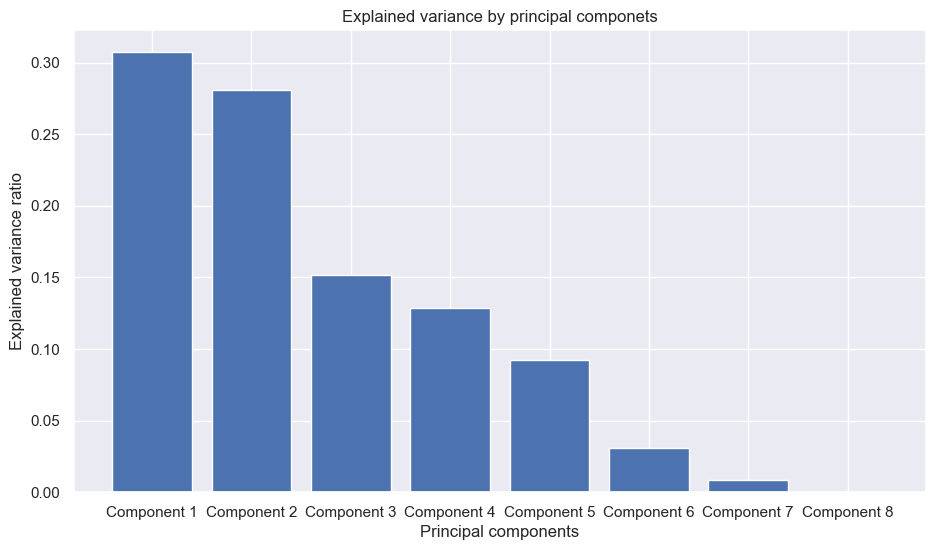

In [10]:
plt.figure(figsize= (11,6))
components = ['Component 1', 'Component 2','Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8']
var_exp = pca.explained_variance_ratio_
plt.bar(components, var_exp)
plt.title('Explained variance by principal componets')
plt.xlabel('Principal components')
plt.ylabel('Explained variance ratio')
plt.show()

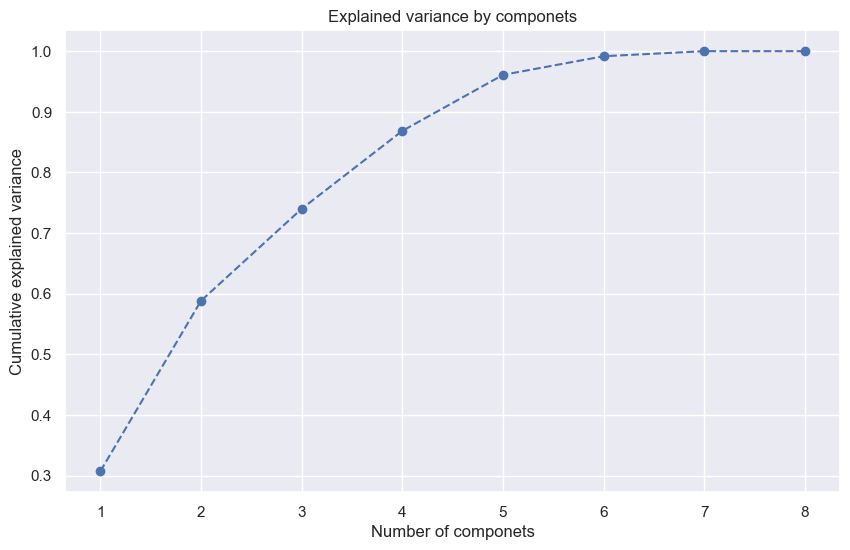

In [11]:
plt.figure(figsize=(10,6))
plt.plot(range(1,9),pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained variance by componets')
plt.xlabel('Number of componets')
plt.ylabel('Cumulative explained variance')
plt.show()

PCA Covariance Matrix

In [12]:
pca = PCA(n_components=4)

In [13]:
pca.fit(df_re_nonull_std)

PCA(n_components=4)

In [14]:
pca.components_

array([[-0.01347829,  0.06534594, -0.06689355, -0.15099905,  0.39492744,
         0.63949973,  0.63509464,  0.        ],
       [-0.61576753, -0.62980998, -0.02208123,  0.4114363 , -0.15693164,
         0.12506318,  0.11888648, -0.        ],
       [ 0.2675697 , -0.06682334,  0.90927776,  0.22605443, -0.12937694,
         0.11386435,  0.1278709 ,  0.        ],
       [ 0.26715037,  0.33315704, -0.3274807 ,  0.55432795, -0.56219835,
         0.20000856,  0.21689532,  0.        ]])

In [15]:
df_pca_comp = pd.DataFrame(data=pca.components_,
                            columns=df_real_state.columns.values,
                            index=['Componet 1', 'Componet 2', 'Componet 3', 'Componet 4'])
df_pca_comp                            

,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status
Componet 1,-0.013478,0.065346,-0.066894,-0.150999,0.394927,0.639500,0.635095,0.0
Componet 2,-0.615768,-0.629810,-0.022081,0.411436,-0.156932,0.125063,0.118886,-0.0
Componet 3,0.267570,-0.066823,0.909278,0.226054,-0.129377,0.113864,0.127871,0.0
Componet 4,0.267150,0.333157,-0.327481,0.554328,-0.562198,0.200009,0.216895,0.0


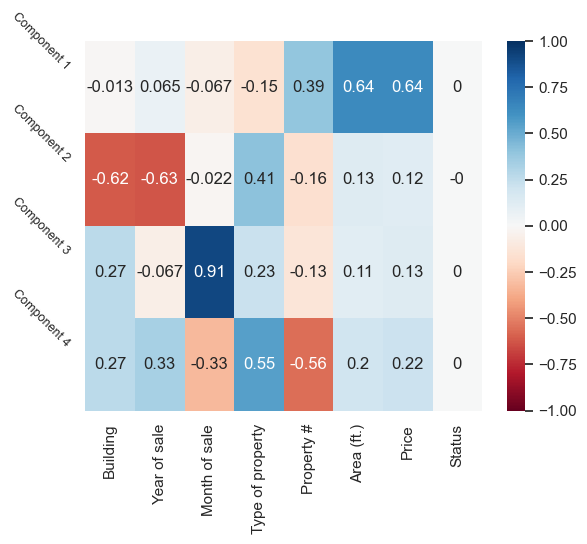

In [16]:
sns.heatmap(df_pca_comp,
            vmin=-1,
            vmax=1,
            cmap='RdBu',
            annot=True
            )
plt.yticks([0,1,2,3],
            ['Component 1', 'Component 2', 'Component 3', 'Component 4'],
            rotation=-45,
            fontsize=9
            )
plt.show()            